### Example 6.1: Driving Home

Each day as you drive home from work, you try to predict how long it will take to get home. When you leave your office, you note the time, the day of week, the weather, and anything else that might be relevant. Say on this Friday you are leaving at exactly 6 o’clock, and you estimate that it will take 30 minutes to get home. As you reach your car it is 6:05, and you notice it is starting to rain. Traffic is often slower in the rain, so you reestimate that it will take 35 minutes from then, or a total of 40 minutes. Fifteen minutes later you have completed the highway portion of your journey in good time. As you exit onto a secondary road you cut your estimate of total travel time to 35 minutes. Unfortunately, at this point you get stuck behind a slow truck, and the road is too narrow to pass. You end up having to follow the truck until you turn onto the side street where you live at 6:40. Three minutes later you are home.

The sequence of states, times, and predictions is thus as follows:

| State                              | Elapsed Time (minutes) | Predicted Time to Go | Predicted Total Time |
|------------------------------------|-------------------------|----------------------|-----------------------|
| leaving office, friday at 6        | 0                       | 30                   | 30                    |
| reach car, raining                 | 5                       | 35                   | 40                    |
| exiting highway                    | 20                      | 15                   | 35                    |
| 2ndary road, behind truck          | 30                      | 10                   | 40                    |
| entering home street               | 40                      | 3                    | 43                    |
| arrive home                        | 43                      | 0                    | 43                    |

The rewards in this example are the elapsed times on each leg of the journey.¹ We are not discounting (𝛾 = 1), and thus the return for each state is the actual time to go from that state. The value of each state is the expected time to go. The second column of numbers gives the current estimated value for each state encountered.

A simple way to view the operation of Monte Carlo methods is to plot the predicted total time (the last column) over the sequence, as in Figure 6.1 (left). The red arrows show the changes in predictions recommended by the constant-𝛼 MC method (6.1), for 𝛼 = 1. These are exactly the errors between the estimated value (predicted time to go) in each state and the actual return (actual time to go). For example, when you exited the highway you thought it would take only 15 minutes more to get home, but in fact it took 23 minutes. Equation 6.1 applies at this point and determines an increment in the estimate of time to go after exiting the highway. The error, *Gₜ − V(Sₜ)*, at this time is eight minutes. Suppose the step-size parameter, 𝛼, is 1/2. Then the predicted time to go after exiting the highway would be revised upward by four minutes as a result of this experience. This is probably too large a change in this case; the truck was probably just an unlucky break. In any event, the change can only be made off-line, that is, after you have reached home. Only at this point do you know any of the actual returns.

Is it necessary to wait until the final outcome is known before learning can begin? Suppose on another day you again estimate when leaving your office that it will take 30 minutes to drive home, but then you become stuck in a massive traffic jam. Twenty-five minutes after leaving the office you are still bumper-to-bumper on the highway. You now estimate that it will take another 25 minutes to get home, for a total of 50 minutes. As you wait in traffic, you already know that your initial estimate of 30 minutes was too optimistic. Must you wait until you get home before increasing your estimate for the initial state? According to the Monte Carlo approach you must, because you don’t yet know the true return.

According to a TD approach, on the other hand, you would learn immediately, shifting your initial estimate from 30 minutes toward 50. In fact, each estimate would be shifted toward the estimate that immediately follows it. Returning to our first day of driving, Figure 6.1 (right) shows the changes in the predictions recommended by the TD rule (6.2) (these are the changes made by the rule if 𝛼 = 1). Each error is proportional to the change over time of the prediction, that is, to the temporal differences in predictions.


![figure 6.1](assets/6.1_figure_6.1.png)

In [23]:
LEAVING_OFFICE = "leaving_office"
REACHING_CAR = "reaching_car"
EXITING_HIGHWAY = "exiting_highway"
SECONDARY_ROAD = "secondary_road"
ENTERING_HOME_STREET = "entering_home_street"
ARRIVE_HOME = "arrive_home"

PLACEHOLDER_ACTION = 'x'

episode = [
    (LEAVING_OFFICE, PLACEHOLDER_ACTION, 0),
    (REACHING_CAR, PLACEHOLDER_ACTION, 0),
    (EXITING_HIGHWAY, PLACEHOLDER_ACTION, 0),
    (SECONDARY_ROAD, PLACEHOLDER_ACTION, 0),
    (ENTERING_HOME_STREET, PLACEHOLDER_ACTION, 0),
    (ARRIVE_HOME, PLACEHOLDER_ACTION, 43),
]

initial_value_dict = {
    LEAVING_OFFICE: 30,
    REACHING_CAR: 40,
    EXITING_HIGHWAY: 35,
    SECONDARY_ROAD: 40,
    ENTERING_HOME_STREET: 43,
    ARRIVE_HOME: 43,
}

mc_value_dict = initial_value_dict.copy()
td_value_dict = initial_value_dict.copy()

total_return = sum(reward for _, _, reward in episode)
print(f"Total return: {total_return}")

Total return: 43


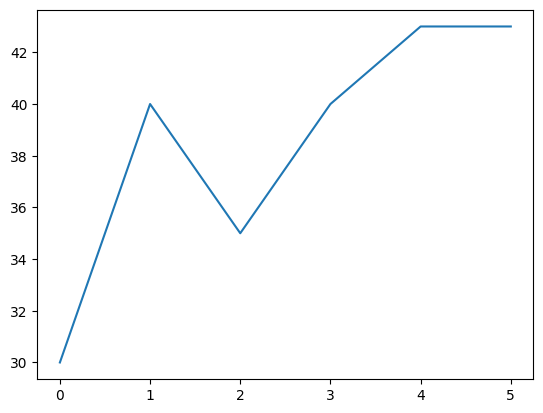

In [24]:
import matplotlib.pyplot as plt
#  graph episode values
initial_values = [initial_value_dict[item[0]] for item in episode]
plt.plot(initial_values)
plt.show()

leaving_office: 43
reaching_car: 43
exiting_highway: 43
secondary_road: 43
entering_home_street: 43
arrive_home: 43


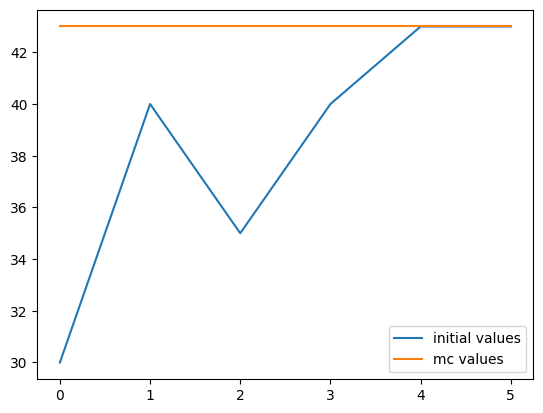

In [25]:
alpha = 1
for state, action, reward in episode:
    error = total_return - mc_value_dict[state]
    mc_value_dict[state] += alpha * error

for key, value in mc_value_dict.items():
    print(f"{key}: {value}")

mc_values = [mc_value_dict[item[0]] for item in episode]
plt.plot(initial_values, label="initial values")
plt.plot(mc_values, label="mc values")
plt.legend()
plt.show()

leaving_office: 40
reaching_car: 35
exiting_highway: 40
secondary_road: 43
entering_home_street: 43
arrive_home: 43


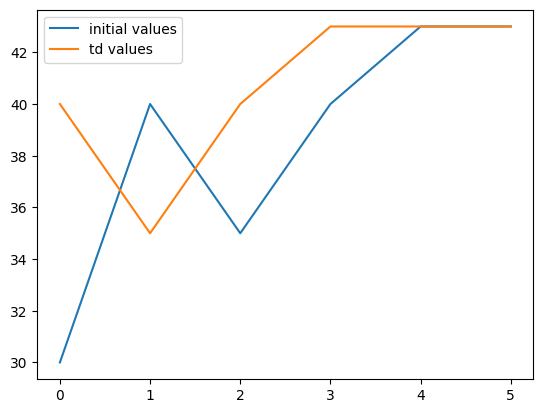

In [26]:
alpha = 1
for i in range(len(episode) - 1):
    state, action, reward = episode[i]
    next_state, next_action, next_reward = episode[i + 1]
    error = td_value_dict[next_state] - td_value_dict[state]
    td_value_dict[state] += alpha * error

for key, value in td_value_dict.items():
    print(f"{key}: {value}")

td_values = [td_value_dict[item[0]] for item in episode]
plt.plot(initial_values, label="initial values")
plt.plot(td_values, label="td values")
plt.legend()
plt.show()